# Brazilian airports dataset

In [95]:
import io
import urllib.request
from base64 import b64encode

import chart_studio.tools as tls
import dash
from dash import html
import folium
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import seaborn as sns
from dash import dcc
from dash.dependencies import Input, Output

In [2]:
# Display all df columns
pd.set_option("display.max_columns", None)

# Set up with a higher resolution screen
%config InlineBackend.figure_format = 'retina'

In [3]:
# loading brazilian airports codes with regular passenger flights between 2002-2021

In [4]:
destinations = pd.read_csv("./assets/csv/destinations.csv", sep=",").drop(
    columns=["Unnamed: 0"]
)

In [5]:
destinations

icao_code
0        SBPA
1        SBRJ
2        SBBR
3        SBFZ
4        SBSP
..        ...
230      SSBZ
231      SSSC
232      SNTS
233      SSLT
234      SNEE

[235 rows x 1 columns]

In [6]:
# loading brazilian airports dataset from "ANAC"

In [7]:
# Dataset source
# https://www.gov.br/anac/pt-br/assuntos/regulados/aerodromos/lista-de-aerodromos-civis-cadastrados

anac_airports = pd.read_csv(
    "./assets/ANAC_aeroportos/aerodromos_publicos_br.csv", sep=","
)

In [8]:
anac_airports

icao_code                  airport_name           municipality state  \
0        SBAA         CONCEIÇÃO DO ARAGUAIA  CONCEIÇÃO DO ARAGUAIA    PA   
1        SBAE                 BAURU/AREALVA        BAURU E AREALVA    SP   
2        SBAQ          BARTOLOMEU DE GUSMÃO             ARARAQUARA    SP   
3        SBAR                   SANTA MARIA                ARACAJU    SE   
4        SBAT   PILOTO OSVALDO MARQUES DIAS          ALTA FLORESTA    MT   
..        ...                           ...                    ...   ...   
507      SNCP  REGIONAL DO PLANALTO SERRANO          CORREIA PINTO    SC   
508      SBTC               UNA/COMANDATUBA                    UNA    BA   
509      SDH2         PORTO ALEGRE DO NORTE  PORTO ALEGRE DO NORTE    MT   
510      SNOF                     OURO FINO              OURO FINO    MG   
511      SDK7                NOVA ANDRADINA         NOVA ANDRADINA    MS   

            lat_dms     lat_dd        long_dms    long_dd  elevation_m  \
0     8° 20' 55'' S  -8.348611  49° 18' 11'' W -49.303056          199   
1     22° 9' 28'' S -22.157778    49° 4' 6'' W -49.068333          594   
2    21° 48' 16'' S -21.804444   48° 8' 25'' W -48.140278          711   
3     10° 59' 7'' S -10.985278   37° 4' 24'' W -37.073333            7   
4     9° 51' 59'' S  -9.866389   56° 6' 18'' W -56.105000          289   
..              ...        ...             ...        ...          ...   
507   27° 38' 3'' S -27.634167  50° 21' 30'' W -50.358333          880   
508  15° 21' 12'' S -15.353333  38° 59' 50'' W -38.997222            7   
509   10° 55' 5'' S -10.918056  51° 36' 32'' W -51.608889          217   
510  22° 17' 51'' S -22.297500  46° 23' 36'' W -46.393333          859   
511   22° 9' 45'' S -22.162500  53° 19' 49'' W -53.330278          419   

                           airport_operation runway_1_name  runway_1_length  \
0            VFR Diurno/Noturno e IFR Diurno         08/26             1800   
1    VFR Diurno/Noturno e IFR Diurno/Noturno         17/35             2010   
2    VFR Diurno/Noturno e IFR Diurno/Noturno         17/35             1800   
3    VFR Diurno/Noturno e IFR Diurno/Noturno         12/30             2200   
4    VFR Diurno/Noturno e IFR Diurno/Noturno         04/22             2500   
..                                       ...           ...              ...   
507  VFR Diurno/Noturno e IFR Diurno/Noturno         09/27             1802   
508  VFR Diurno/Noturno e IFR Diurno/Noturno         02/20             2000   
509                               VFR Diurno         12/30             1600   
510                               VFR Diurno         06/24             1080   
511                               VFR Diurno         12/30             1300   

     runway_1_width runway_1_resistance runway_1_surface runway_2_name  \
0              30.0      PCN 47/F/C/X/U          Asfalto           NaN   
1              45.0      PCN 42/F/A/X/T          Asfalto           NaN   
2              30.0      PCN 40/F/A/X/T          Asfalto           NaN   
3              45.0      PCN 48/F/B/X/T          Asfalto           NaN   
4              30.0      PCN 29/F/C/X/U          Asfalto           NaN   
..              ...                 ...              ...           ...   
507            30.0      PCN 57/F/B/X/T          Asfalto           NaN   
508            30.0      PCN 40/F/C/X/T          Asfalto           NaN   
509            18.0   5700 kg / 0,7 MPa          Asfalto           NaN   
510            50.0   2500 kg / 0,5 MPa            Grama           NaN   
511            23.0     5680 kg / 1 MPa          Asfalto           NaN   

     runway_2_length  runway_2_width runway_2_resistance runway_2_surface  \
0                NaN             NaN                 NaN              NaN   
1                NaN             NaN                 NaN              NaN   
2                NaN             NaN                 NaN              NaN   
3                NaN             NaN                 NaN

In [9]:
# loading dataset with worldwide airports from "Our Airports"

In [10]:
# Dataset source
# https://ourairports.com/data/

airport_codes_ww = pd.read_csv("./assets/airports_ourairports.csv", sep=",")

In [11]:
airport_codes_ww.head()

id    ident           type  \
0       3     AGGH  large_airport   
1      67     AYPY  large_airport   
2     123     BIKF  large_airport   
3    4614     BKPR  large_airport   
4  329666  CN-0083  large_airport   

                                          name  latitude_deg  longitude_deg  \
0                Honiara International Airport     -9.428000     160.054993   
1  Port Moresby Jacksons International Airport     -9.443380     147.220001   
2               Keflavik International Airport     63.985001     -22.605600   
3  Priština Adem Jashari International Airport     42.572800      21.035801   
4                               Guodu Air Base     36.001741     117.632010   

   elevation_ft continent iso_country iso_region    municipality  \
0          28.0        OC          SB      SB-CT         Honiara   
1         146.0        OC          PG     PG-NCD    Port Moresby   
2         171.0        EU          IS       IS-2       Reykjavík   
3        1789.0        EU          XK      XK-01       Prishtina   
4           NaN        AS          CN      CN-37  Xintai, Tai'an   

  scheduled_service gps_code iata_code local_code  \
0               yes     AGGH       HIR        NaN   
1               yes     AYPY       POM        NaN   
2               yes     BIKF       KEF        NaN   
3               yes     BKPR       PRN        NaN   
4                no      NaN       NaN        NaN   

                                   home_link  \
0                                        NaN   
1                                        NaN   
2  https://www.isavia.is/en/keflavik-airport   
3            http://www.airportpristina.com/   
4                                        NaN   

                                      wikipedia_link  \
0  https://en.wikipedia.org/wiki/Honiara_Internat...   
1  https://en.wikipedia.org/wiki/Jacksons_Interna...   
2  https://en.wikipedia.org/wiki/Keflav%C3%ADk_In...   
3  https://en.wikipedia.org/wiki/Pristina_Interna...   
4                                                NaN   

                           keywords  
0                   Henderson Field  
1                               NaN  
2    Keflavik Naval Air Station,REK  
3  LYPR, Pristina, Slatina Air Base  
4                               NaN

In [12]:
airport_codes_br = airport_codes_ww[airport_codes_ww["iso_country"] == "BR"]

In [13]:
airport_codes_br.head()

id ident           type  \
479  5867  SBBE  large_airport   
480  5872  SBBR  large_airport   
481  5882  SBCF  large_airport   
482  5891  SBCT  large_airport   
483  5897  SBEG  large_airport   

                                                  name  latitude_deg  \
479  Val de Cans/Júlio Cezar Ribeiro International ...     -1.379279   
480  Presidente Juscelino Kubitschek International ...    -15.869167   
481               Tancredo Neves International Airport    -19.635710   
482                                Afonso Pena Airport    -25.528500   
483                Eduardo Gomes International Airport     -3.038610   

     longitude_deg  elevation_ft continent iso_country iso_region  \
479     -48.476207          54.0        SA          BR      BR-PA   
480     -47.920834        3497.0        SA          BR      BR-DF   
481     -43.966928        2721.0        SA          BR      BR-MG   
482     -49.175800        2988.0        SA          BR      BR-PR   
483     -60.049702         264.0        SA          BR      BR-AM   

       municipality scheduled_service gps_code iata_code local_code  \
479           Belém               yes     SBBE       BEL     PA0001   
480        Brasília               yes     SBBR       BSB     DF0001   
481  Belo Horizonte               yes     SBCF       CNF     MG0001   
482        Curitiba               yes     SBCT       CWB     PR0001   
483          Manaus               yes     SBEG       MAO     AM0001   

                                             home_link  \
479  http://www.infraero.gov.br/index.php/br/aeropo...   
480  http://www.infraero.gov.br/usa/aero_prev_home....   
481  http://www.infraero.gov.br/usa/aero_prev_home....   
482                                                NaN   
483  https://www4.infraero.gov.br/aeroportos/aeropo...   

                                        wikipedia_link  \
479  https://en.wikipedia.org/wiki/Val_de_Cans_Inte...   
480  https://en.wikipedia.org/wiki/Bras%C3%ADlia_In...   
481  https://en.wikipedia.org/wiki/Tancredo_Neves_I...   
482  https://en.wikipedia.org/wiki/Afonso_Pena_Inte...   
483  https://en.wikipedia.org/wiki/Eduardo_Gomes_In...   

                                              keywords  
479                                                NaN  
480                                                NaN  
481  http://www.infraero.gov.br/usa/aero_prev_home....  
482                                                NaN  
483                                                NaN

In [14]:
airport_codes_br = airport_codes_br.iloc[:, [1, 2, 3, 4, 5, 9, 10, 13]]

In [15]:
airport_codes_br.columns

Index(['ident', 'type', 'name', 'latitude_deg', 'longitude_deg', 'iso_region',
       'municipality', 'iata_code'],
      dtype='object')

In [16]:
airport_codes_br.rename(
    columns={
        "ident": "icao_code",
        "name": "airport_name",
        "latitude_deg": "lat_deg",
        "longitude_deg": "long_deg",
        "iso_region": "state",
    },
    inplace=True,
)

In [17]:
airport_codes_br.columns

Index(['icao_code', 'type', 'airport_name', 'lat_deg', 'long_deg', 'state',
       'municipality', 'iata_code'],
      dtype='object')

In [18]:
airport_codes_br["state"] = airport_codes_br["state"].str[3:]

In [19]:
airport_codes_br

icao_code           type  \
479        SBBE  large_airport   
480        SBBR  large_airport   
481        SBCF  large_airport   
482        SBCT  large_airport   
483        SBEG  large_airport   
...         ...            ...   
36646      SWZV  small_airport   
36647      SWZW  small_airport   
36648      SWZY  small_airport   
40879       XIG  small_airport   
42688       ZMD  small_airport   

                                            airport_name    lat_deg  \
479    Val de Cans/Júlio Cezar Ribeiro International ...  -1.379279   
480    Presidente Juscelino Kubitschek International ... -15.869167   
481                 Tancredo Neves International Airport -19.635710   
482                                  Afonso Pena Airport -25.528500   
483                  Eduardo Gomes International Airport  -3.038610   
...                                                  ...        ...   
36646                       Fazenda Rodoserv III Airport -21.862223   
36647                  Fazenda Santa Fé do Xingu Airport -10.321111   
36648                      Fazenda Sete Estrelas Airport -11.576917   
40879                         Xinguara Municipal Airport  -7.090600   
42688                             Sena Madureira Airport  -9.116000   

        long_deg state       municipality iata_code  
479   -48.476207    PA              Belém       BEL  
480   -47.920834    DF           Brasília       BSB  
481   -43.966928    MG     Belo Horizonte       CNF  
482   -49.175800    PR           Curitiba       CWB  
483   -60.049702    AM             Manaus       MAO  
...          ...   ...                ...       ...  
36646 -56.773888    MS         Bela Vista       NaN  
36647 -52.210556    MT  São José do Xingu       NaN  
36648 -58.234363    MT          Brasnorte       NaN  
40879 -49.976500    PA           Xinguara       XIG  
42688 -68.610800    AC     Sena Madureira       ZMD  

[4261 rows x 8 columns]

In [20]:
# checking airport icao codes that are not in csv from ANAC

In [21]:
missing_airports = airport_codes_br[
    airport_codes_br["icao_code"].isin(
        [
            "SBNT",
            "SBBV",
            "SBQV",
            "SJHG",
            "SDOW",
            "SWGI",
            "SNKE",
            "SWSI",
            "SWRD",
            "SBCM",
            "SBFE",
            "SNJD",
            "SSZW",
            "SBBT",
            "SSPB",
            "SBRG",
            "SBGU",
            "SBUY",
            "SSOU",
            "SJTC",
            "SNRJ",
            "SDWQ",
            "SBGS",
            "SBBZ",
            "SSBZ",
        ]
    )
]

In [22]:
missing_airports

icao_code            type  \
3884       SBBT  medium_airport   
3885       SBBV  medium_airport   
3887       SBBZ  medium_airport   
3894       SBCM  medium_airport   
3941       SBNT  medium_airport   
4038       SJTC  medium_airport   
4149       SSZW  medium_airport   
4202       SWRD  medium_airport   
31478      SBGU   small_airport   
32339      SDOW   small_airport   
33193      SJHG   small_airport   
34636      SNJD   small_airport   
34659      SNKE   small_airport   
34810      SNRJ   small_airport   
35243      SSBZ   small_airport   
35520      SSOU   small_airport   
35525      SSPB   small_airport   
36244      SWGI   small_airport   
36490      SWSI   small_airport   

                                            airport_name    lat_deg  \
3884                                Chafei Amsei Airport -20.584499   
3885                     Atlas Brasil Cantanhede Airport   2.845855   
3887                             Umberto Modiano Airport -22.770881   
3894                            Diomício Freitas Airport -28.725743   
3941                                Natal Air Force Base  -5.911420   
4038    Bauru/Arealva–Moussa Nakhal Tobias State Airport -22.160755   
4149   Ponta Grossa Airport - Comandante Antonio Amil... -25.184700   
4202                      Maestro Marinho Franco Airport -16.586000   
31478                   Tancredo Thomas de Faria Airport -25.388327   
32339                        Ourilândia do Norte Airport  -6.763100   
33193                                   Confresa Airport -10.633296   
34636                       João Durval Carneiro Airport -12.200300   
34659                        Santana do Araguaia Airport  -9.319970   
34810                                      Brejo Airport  -3.666944   
35243                                  Aeroclube Airport -29.676111   
35520                            Fazenda Inhumas Airport -17.036942   
35525                   Juvenal Loureiro Cardoso Airport -26.217184   
36244                                     Gurupi Airport -11.739600   
36490         Presidente João Batista Figueiredo Airport -11.885001   

        long_deg state         municipality iata_code  
3884  -48.594101    SP             Barretos       BAT  
3885  -60.690944    RR            Boa Vista       BVB  
3887  -41.963080    RJ            Cabo Frio       BZC  
3894  -49.424475    SC             Criciúma       CCM  
3941  -35.247700    RN                Natal       NaN  
4038  -49.070325    SP                Bauru       JTC  
4149  -50.144100    PR         Ponta Grossa       PGZ  
4202  -54.724800    MT         Rondonópolis       ROO  
31478 -51.523490    PR           Guarapuava       GPB  
32339 -51.049900    PA  Ourilândia do Norte       OIA  
33193 -51.565836    MT             Confresa       CFO  
34636 -38.906799    BA     Feira De Santana       FEC  
34659 -50.328499    PA  Santana Do Araguaia       CMP  
34810 -42.833889    MA                Brejo       NaN  
35243 -50.981388    RS            Sapiranga       NaN  
35520 -46.260277    MG             Paracatu       NaN  
35525 -52.694463    PR          Pato Branco       PTO  
36244 -49.132198    TO               Gurupi       GRP  
36490 -55.586109    MT                Sinop       OPS

In [23]:
# merging destinations dataset with airport_codes_br

In [24]:
destinations_airport_codes_br = destinations.merge(
    airport_codes_br, how="left", left_on="icao_code", right_on="icao_code"
)

In [25]:
destinations_airport_codes_br

icao_code            type  \
0        SBPA  medium_airport   
1        SBRJ  medium_airport   
2        SBBR   large_airport   
3        SBFZ  medium_airport   
4        SBSP   large_airport   
..        ...             ...   
230      SSBZ   small_airport   
231      SSSC   small_airport   
232      SNTS   small_airport   
233      SSLT   small_airport   
234      SNEE   small_airport   

                                          airport_name    lat_deg   long_deg  \
0                  Salgado Filho International Airport -29.994712 -51.166592   
1                                Santos Dumont Airport -22.910500 -43.163101   
2    Presidente Juscelino Kubitschek International ... -15.869167 -47.920834   
3                  Pinto Martins International Airport  -3.776280 -38.532600   
4                                    Congonhas Airport -23.626110 -46.656387   
..                                                 ...        ...        ...   
230                                  Aeroclube Airport -29.676111 -50.981388   
231                          Santa Cruz do Sul Airport -29.684099 -52.412201   
232                 Aeroporto Brigadeiro Firmino Ayres  -7.038990 -37.251598   
233                              Alegrete Novo Airport -29.812700 -55.893398   
234                                       Jauá Airport -12.809597 -38.248258   

    state       municipality iata_code  
0      RS       Porto Alegre       POA  
1      RJ     Rio De Janeiro       SDU  
2      DF           Brasília       BSB  
3      CE          Fortaleza       FOR  
4      SP          São Paulo       CGH  
..    ...                ...       ...  
230    RS          Sapiranga       NaN  
231    RS  Santa Cruz Do Sul       CSU  
232    PB              Patos       JPO  
233    RS           Alegrete       ALQ  
234    BA           Camaçari       NaN  

[235 rows x 8 columns]

In [26]:
destinations_airport_codes_br[destinations_airport_codes_br["lat_deg"].isnull()]

icao_code type airport_name  lat_deg  long_deg state municipality  \
72       SBJI  NaN          NaN      NaN       NaN   NaN          NaN   
74       SBQV  NaN          NaN      NaN       NaN   NaN          NaN   
86       SWIQ  NaN          NaN      NaN       NaN   NaN          NaN   
96       SBDO  NaN          NaN      NaN       NaN   NaN          NaN   
140      SBTG  NaN          NaN      NaN       NaN   NaN          NaN   
146      SBFE  NaN          NaN      NaN       NaN   NaN          NaN   
150      SBRD  NaN          NaN      NaN       NaN   NaN          NaN   
157      SBJE  NaN          NaN      NaN       NaN   NaN          NaN   
170      SBPG  NaN          NaN      NaN       NaN   NaN          NaN   
179      SBSI  NaN          NaN      NaN       NaN   NaN          NaN   
184      SBVC  NaN          NaN      NaN       NaN   NaN          NaN   
186      SBRG  NaN          NaN      NaN       NaN   NaN          NaN   
195      SNBA  NaN          NaN      NaN       NaN   NaN          NaN   
203      SDNM  NaN          NaN      NaN       NaN   NaN          NaN   
211      SBUY  NaN          NaN      NaN       NaN   NaN          NaN   
217      SDWQ  NaN          NaN      NaN       NaN   NaN          NaN   
220      SBGS  NaN          NaN      NaN       NaN   NaN          NaN   
224      SSTE  NaN          NaN      NaN       NaN   NaN          NaN   

    iata_code  
72        NaN  
74        NaN  
86        NaN  
96        NaN  
140       NaN  
146       NaN  
150       NaN  
157       NaN  
170       NaN  
179       NaN  
184       NaN  
186       NaN  
195       NaN  
203       NaN  
211       NaN  
217       NaN  
220       NaN  
224       NaN

In [27]:
airport_codes_br_2 = airport_codes_br.copy()

In [28]:
airport_codes_br_2 = airport_codes_br_2.iloc[:, [0, 3, 4, 7]]

In [29]:
destinations_airport_codes_br_2 = pd.merge(
    destinations, airport_codes_br_2, on=["icao_code"], how="left"
)
destinations_airport_codes_br_2

icao_code    lat_deg   long_deg iata_code
0        SBPA -29.994712 -51.166592       POA
1        SBRJ -22.910500 -43.163101       SDU
2        SBBR -15.869167 -47.920834       BSB
3        SBFZ  -3.776280 -38.532600       FOR
4        SBSP -23.626110 -46.656387       CGH
..        ...        ...        ...       ...
230      SSBZ -29.676111 -50.981388       NaN
231      SSSC -29.684099 -52.412201       CSU
232      SNTS  -7.038990 -37.251598       JPO
233      SSLT -29.812700 -55.893398       ALQ
234      SNEE -12.809597 -38.248258       NaN

[235 rows x 4 columns]

In [30]:
# merge with anac_airports

In [31]:
merged_airports = pd.merge(
    destinations_airport_codes_br_2, anac_airports, on=["icao_code"], how="left"
)
merged_airports

icao_code    lat_deg   long_deg iata_code  \
0        SBPA -29.994712 -51.166592       POA   
1        SBRJ -22.910500 -43.163101       SDU   
2        SBBR -15.869167 -47.920834       BSB   
3        SBFZ  -3.776280 -38.532600       FOR   
4        SBSP -23.626110 -46.656387       CGH   
..        ...        ...        ...       ...   
230      SSBZ -29.676111 -50.981388       NaN   
231      SSSC -29.684099 -52.412201       CSU   
232      SNTS  -7.038990 -37.251598       JPO   
233      SSLT -29.812700 -55.893398       ALQ   
234      SNEE -12.809597 -38.248258       NaN   

                        airport_name       municipality state         lat_dms  \
0                      SALGADO FILHO       PORTO ALEGRE    RS  29° 59' 41'' S   
1                      SANTOS DUMONT     RIO DE JANEIRO    RJ  22° 54' 36'' S   
2    PRESIDENTE JUSCELINO KUBITSCHEK           BRASÍLIA    DF  15° 52' 16'' S   
3                      PINTO MARTINS          FORTALEZA    CE   3° 46' 33'' S   
4                          CONGONHAS          SÃO PAULO    SP  23° 37' 34'' S   
..                               ...                ...   ...             ...   
230                              NaN                NaN   NaN             NaN   
231                SANTA CRUZ DO SUL  SANTA CRUZ DO SUL    RS   29° 41' 3'' S   
232         BRIGADEIRO FIRMINO AYRES              PATOS    PB    7° 2' 16'' S   
233          GAUDÊNCIO MACHADO RAMOS           ALEGRETE    RS  29° 48' 45'' S   
234                     VACARIA NOVO            VACARIA    RS  28° 25' 55'' S   

        lat_dd        long_dms    long_dd  elevation_m  \
0   -29.994722  51° 10' 16'' W -51.171111          4.0   
1   -22.910000   43° 9' 45'' W -43.162500          3.0   
2   -15.871111   47° 55' 7'' W -47.918611       1066.0   
3    -3.775833  38° 31' 56'' W -38.532222         25.0   
4   -23.626111  46° 39' 23'' W -46.656389        802.0   
..         ...             ...        ...          ...   
230        NaN             NaN        NaN          NaN   
231 -29.684167  52° 24' 44'' W -52.412222        199.0   
232  -7.037778  37° 15' 27'' W -37.257500        265.0   
233 -29.812500  55° 53' 36'' W -55.893333        125.0   
234 -28.431944   51° 1' 22'' W -51.022778        900.0   

                           airport_operation runway_1_name  runway_1_length  \
0    VFR Diurno/Noturno e IFR Diurno/Noturno         11/29           2280.0   
1    VFR Diurno/Noturno e IFR Diurno/Noturno        2R/20L           1323.0   
2    VFR Diurno/Noturno e IFR Diurno/Noturno       11L/29R           3200.0   
3    VFR Diurno/Noturno e IFR Diurno/Noturno         13/31           2755.0   
4    VFR Diurno/Noturno e IFR Diurno/Noturno       17R/35L           1940.0   
..                                       ...           ...              ...   
230                                      NaN           NaN              NaN   
231                               VFR Diurno         08/26           1180.0   
232                       VFR Diurno/Noturno         12/30           1600.0   
233                               VFR Diurno         15/33           1200.0   
234                               VFR Diurno         11/29           2020.0   

     runway_1_width runway_1_resistance runway_1_surface runway_2_name  \
0              45.0      PCN 72/F/B/X/T          Asfalto           NaN   
1              42.0      PCN 65/F/A/W/T          Asfalto        2L/20R   
2              45.0      PCN 76/F/B/X/T          Asfalto       11R/29L   
3              45.0      PCN 66/F/A/X/T          Asfalto           NaN   
4              45.0      PCN 50/F/B/X/T          Asfalto       17L/35R   
..              ...                 ...              ...           ...   
230             NaN                 NaN              NaN           NaN   
231            18.0       PCN 8/F/C/Y/U          Asfalto           NaN   
232            30.0       PCN 6/F/C/Y/U          Asfalto           NaN   
233            18.0       PCN 6/F/B/X/T          Asfalto

In [32]:
merged_airports.columns

Index(['icao_code', 'lat_deg', 'long_deg', 'iata_code', 'airport_name',
       'municipality', 'state', 'lat_dms', 'lat_dd', 'long_dms', 'long_dd',
       'elevation_m', 'airport_operation', 'runway_1_name', 'runway_1_length',
       'runway_1_width', 'runway_1_resistance', 'runway_1_surface',
       'runway_2_name', 'runway_2_length', 'runway_2_width',
       'runway_2_resistance', 'runway_2_surface', 'airport_tax_class',
       'weekly_schedule'],
      dtype='object')

In [33]:
merged_airports_2 = merged_airports[~merged_airports["lat_deg"].isnull()]

In [34]:
locations = merged_airports_2[["lat_deg", "long_deg"]].apply(pd.to_numeric)
locationlist = locations.values.tolist()
len(locationlist)

217

In [35]:
# exporting csv to check missing airports and coordinates accuracy

In [36]:
# loading csv with accurate coordinates

In [37]:
airports_br = pd.read_csv("./assets/csv/airports_brazil.csv", sep=",")

In [38]:
airports_br["airport_name"] = airports_br["airport_name"].str.title()
airports_br["city_primary"] = airports_br["city_primary"].str.title()
airports_br["city_secondary"] = airports_br["city_secondary"].str.title()

In [39]:
# fixing data erros, two airports with wrong runway length, 100 instead of 1000 meters

In [40]:
airports_br.runway_1_length.sort_values().unique(), airports_br.runway_1_length.sort_values().nunique()

(array([ 650,  685,  700,  800,  820,  900,  913,  940,  960, 1000, 1033,
        1050, 1080, 1100, 1106, 1148, 1170, 1180, 1190, 1200, 1211, 1220,
        1260, 1265, 1270, 1275, 1280, 1300, 1320, 1323, 1340, 1350, 1365,
        1370, 1400, 1410, 1425, 1430, 1455, 1460, 1480, 1491, 1500, 1501,
        1506, 1507, 1515, 1520, 1532, 1535, 1540, 1541, 1544, 1550, 1577,
        1593, 1598, 1600, 1610, 1615, 1620, 1621, 1625, 1627, 1630, 1640,
        1665, 1670, 1700, 1701, 1730, 1750, 1759, 1798, 1800, 1804, 1845,
        1850, 1900, 1940, 1950, 1980, 2000, 2003, 2005, 2010, 2020, 2063,
        2082, 2100, 2120, 2150, 2158, 2195, 2200, 2218, 2280, 2286, 2300,
        2364, 2380, 2385, 2400, 2499, 2500, 2515, 2525, 2550, 2600, 2602,
        2676, 2700, 2755, 2800, 3000, 3003, 3007, 3200, 3240, 3250, 3600,
        3700, 4000]),
 123)

In [41]:
airports_br[airports_br.runway_1_length == 100]

Empty DataFrame
Columns: [Unnamed: 0, icao_code, icao_code_old, iata_code, iata_code_old, airport_name, city_primary, city_secondary, state, lat_dd, long_dd, elevation_m, airport_operation, runway_1_name, runway_1_length, runway_1_width, runway_1_resistance, runway_1_surface, runway_2_name, runway_2_length, runway_2_width, runway_2_resistance, runway_2_surface, airport_tax_class]
Index: []

In [42]:
airports_br.at[132, "runway_1_length"] = 1000

In [43]:
airports_br.at[205, "runway_1_length"] = 1000

In [44]:
# Creating dictionaries with english values for categories

In [45]:
airports_br["airport_operation"].sort_values().unique()

array(['Day VFR', 'Day VFR and Day IFR', 'Day VFR and Day/Night IFR',
       'Day/Night VFR', 'Day/Night VFR and Day IFR',
       'Day/Night VFR and Day/Night IFR'], dtype=object)

> Visual Flight Rules (VFR) means that the aircraft is intended to operate in visual meteorological conditions (VMC, i.e. nice and clear weather).
> Instrument Flight Rules (IFR) implies that the flight may operate in instrument meteorological conditions (IMC, meaning cloudy or otherwise adverse weather conditions).

- VFR Diurno = Day VFR
- VFR Diurno e IFR Diurno = Day VFR and Day IFR
- VFR Diurno e IFR Diurno/Noturno = Day VFR and Day/Night IFR
- VFR Diurno/Noturno = Day/Night VFR
- VFR Diurno/Noturno e IFR Diurno = Day/Night VFR and Day IFR
- VFR Diurno/Noturno e IFR Diurno/Noturno = Day/Night VFR and Day/Night IFR

In [50]:
airports_br["airport_operation"].value_counts()

Day/Night VFR and Day/Night IFR    105
Day VFR                             65
Day/Night VFR                       52
Day VFR and Day/Night IFR            5
Day/Night VFR and Day IFR            3
Day VFR and Day IFR                  2
Name: airport_operation, dtype: int64

In [51]:
airports_br

Unnamed: 0 icao_code icao_code_old iata_code iata_code_old  \
0             0      SBAA           NaN       CDJ           NaN   
1             1      SBAC           NaN       ARX           NaN   
2             2      SBAE          SJTC       JTC           NaN   
3             3      SBAQ           NaN       AQA           NaN   
4             4      SBAR           NaN       AJU           NaN   
..          ...       ...           ...       ...           ...   
227         227      SWPI           NaN       PIN           NaN   
228         228      SWPY           NaN       NaN           NaN   
229         229      SWTP           NaN       IRZ           NaN   
230         230      SWTS           NaN       TGQ           NaN   
231         231      SWVC           NaN       VLP           NaN   

                                          airport_name  \
0                                Conceição Do Araguaia   
1    Aeroporto Regional De Canoa Quebrada Dragão Do...   
2                 Bauru, Arealva / Moussa Nakhl Tobias   
3                                 Bartolomeu De Gusmão   
4                                          Santa Maria   
..                                                 ...   
227                                          Parintins   
228                                 Primavera Do Leste   
229                                        Tapuruquara   
230                                   Tangará Da Serra   
231                                          Vila Rica   

                  city_primary city_secondary state     lat_dd    long_dd  \
0        Conceição Do Araguaia            NaN    PA  -8.348611 -49.303056   
1                      Aracati            NaN    CE  -4.568611 -37.804722   
2                      Arealva          Bauru    SP -22.157778 -49.068333   
3                   Araraquara            NaN    SP -21.804444 -48.140278   
4                      Aracaju            NaN    SE -10.985278 -37.073333   
..                         ...            ...   ...        ...        ...   
227                  Parintins            NaN    AM  -2.669444 -56.771111   
228         Primavera Do Leste            NaN    MT -15.565556 -54.337778   
229  Santa Isabel Do Rio Negro            NaN    AM  -0.416944 -65.033889   
230           Tangará Da Serra            NaN    MT -14.661944 -57.443889   
231                  Vila Rica            NaN    MT  -9.981111 -51.140556   

     elevation_m                airport_operation runway_1_name  \
0            199        Day/Night VFR and Day IFR         08/26   
1             36  Day/Night VFR and Day/Night IFR         09/27   
2            594  Day/Night VFR and Day/Night IFR         17/35   
3            711  Day/Night VFR and Day/Night IFR         17/35   
4              7  Day/Night VFR and Day/Night IFR         12/30   
..           ...                              ...           ...   
227           26                    Day/Night VFR         06/24   
228          655                          Day VFR         01/19   
229           68                          Day VFR         09/27   
230          449                          Day VFR         18/36   
231          254                          Day VFR         07/25   

     runway_1_length  runway_1_width runway_1_resistance runway_1_surface  \
0               1800              30      PCN 47/F/C/X/U          Asphalt   
1               1800              30      PCN 36/F/A/X/U          Asphalt   
2               2010              45      PCN 42/F/A/X/T          Asphalt   
3               1800              30      PCN 40/F/A/X/T          Asphalt   
4               2200              45      PCN 48/F/B/X/T          Asphalt   
..               ...             ...                 ...              ...   
227             1800              30      PCN 33/F/B/X/T          Asphalt   
228             1100              23   5000 kg / 0,5 MPa             Dirt   
229             1200              30       PCN 8/F/C/Y/U          Asphalt   
230

In [52]:
# exporting csv

In [53]:
# airports analysis

In [54]:
# airports with a secondary city

In [55]:
airports_br.city_secondary.sort_values().unique(), airports_br.city_secondary.sort_values().nunique()

(array(['Bauru', 'Criciúma', 'Curitiba', 'Jijoca De Jericoacoara',
        'Monte Dourado District Of Almeirim', 'Natal',
        'Porto Trombetas District Of Oriximiná',
        'Porto Urucu District Of Coari', nan], dtype=object),
 8)

In [56]:
# operation

In [57]:
operation = (
    airports_br.groupby("airport_operation")
    .agg(
        nr_airports=("icao_code", "count"),
        runway_mean=("runway_1_length", "mean"),
        runway_min=("runway_1_length", "min"),
        runway_max=("runway_1_length", "max"),
    )
    .round(2)
    .reset_index()
)

In [58]:
percentage = round((operation["nr_airports"] / operation["nr_airports"].sum()) * 100, 2)

In [59]:
operation.insert(loc=1, column="percentage", value=percentage)

In [60]:
operation

airport_operation  percentage  nr_airports  runway_mean  \
0                          Day VFR       28.02           65      1278.75   
1              Day VFR and Day IFR        0.86            2      2057.50   
2        Day VFR and Day/Night IFR        2.16            5      2066.00   
3                    Day/Night VFR       22.41           52      1535.44   
4        Day/Night VFR and Day IFR        1.29            3      1428.67   
5  Day/Night VFR and Day/Night IFR       45.26          105      2096.27   

   runway_min  runway_max  
0         650        2300  
1        1515        2600  
2        1800        2525  
3         900        2500  
4        1211        1800  
5        1200        4000

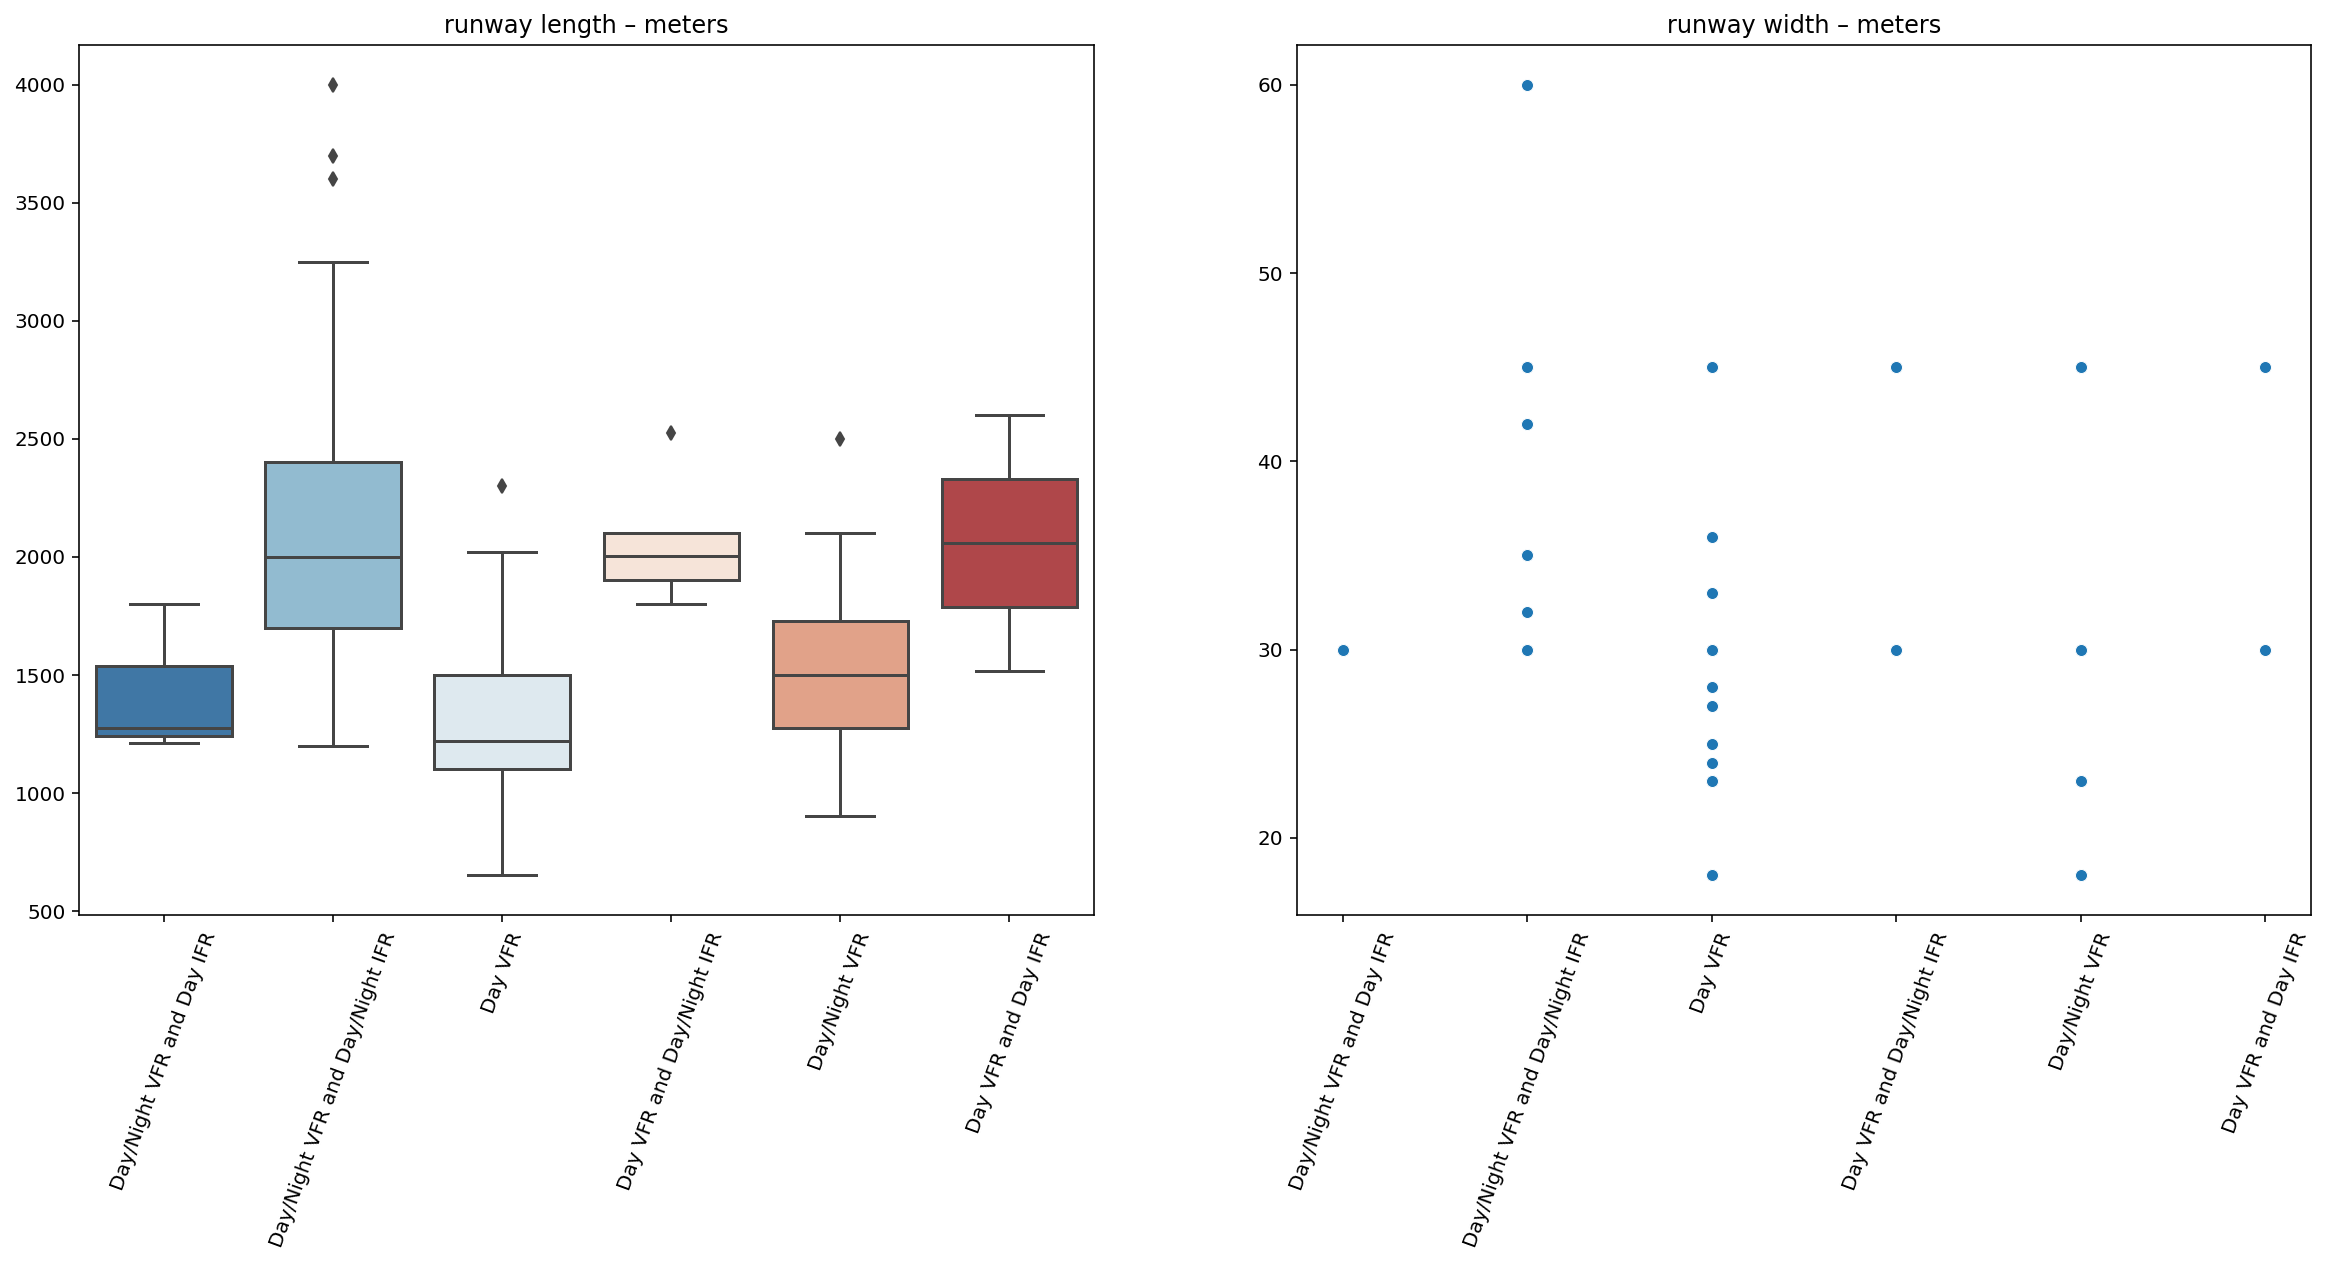

In [61]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.boxplot(
    x="airport_operation",
    y="runway_1_length",
    data=airports_br,
    ax=ax[0],
    palette="RdBu_r",
)
ax[0].tick_params(axis="x", labelrotation=70)
ax[0].set_title("runway length – meters")
ax[0].set_xlabel("")
ax[0].set_ylabel("")

sns.scatterplot(
    x="airport_operation",
    y="runway_1_width",
    data=airports_br,
    ax=ax[1],
    palette="RdBu_r",
)
ax[1].tick_params(axis="x", labelrotation=70)
ax[1].set_title("runway width – meters")
ax[1].set_xlabel("")
ax[1].set_ylabel("")

plt.show()

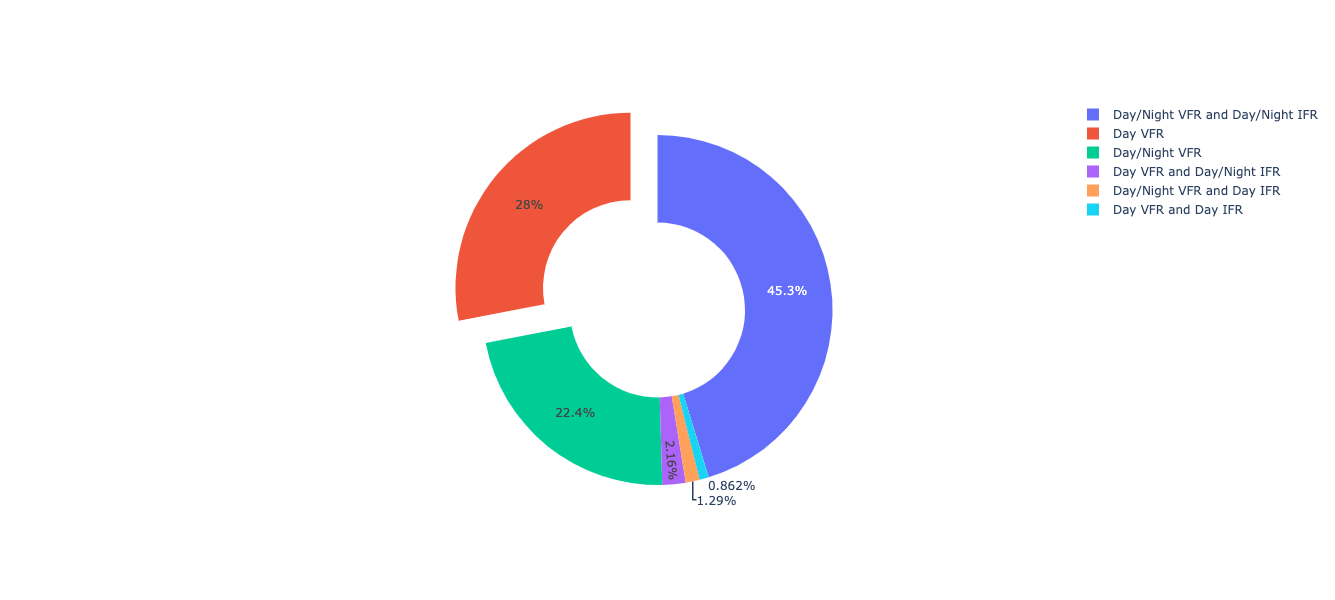

In [62]:
fig = go.Figure(
    data=[
        go.Pie(
            labels=operation["airport_operation"],
            values=operation["nr_airports"],
            hole=0.5,
            pull=[0.2, 0, 0, 0, 0, 0],
        )
    ]
)
fig.update_layout(
    title="",
    autosize=False,
    width=600,
    height=600,
)
# fig.write_html("./presentation/plots/donut_airport_operations.html")
fig.show()

In [63]:
airports_state_year = pd.read_csv(
    "./assets/csv/functions/airports_state_year.csv", sep=","
).drop(columns="Unnamed: 0")

In [64]:
airports_state_year

dep_state  airports  year
0          AC         2  2002
1          AL         1  2002
2          AM         3  2002
3          AP         1  2002
4          BA         6  2002
..        ...       ...   ...
535        RS        16  2021
536        SC         5  2021
537        SE         1  2021
538        SP        13  2021
539        TO         2  2021

[540 rows x 3 columns]

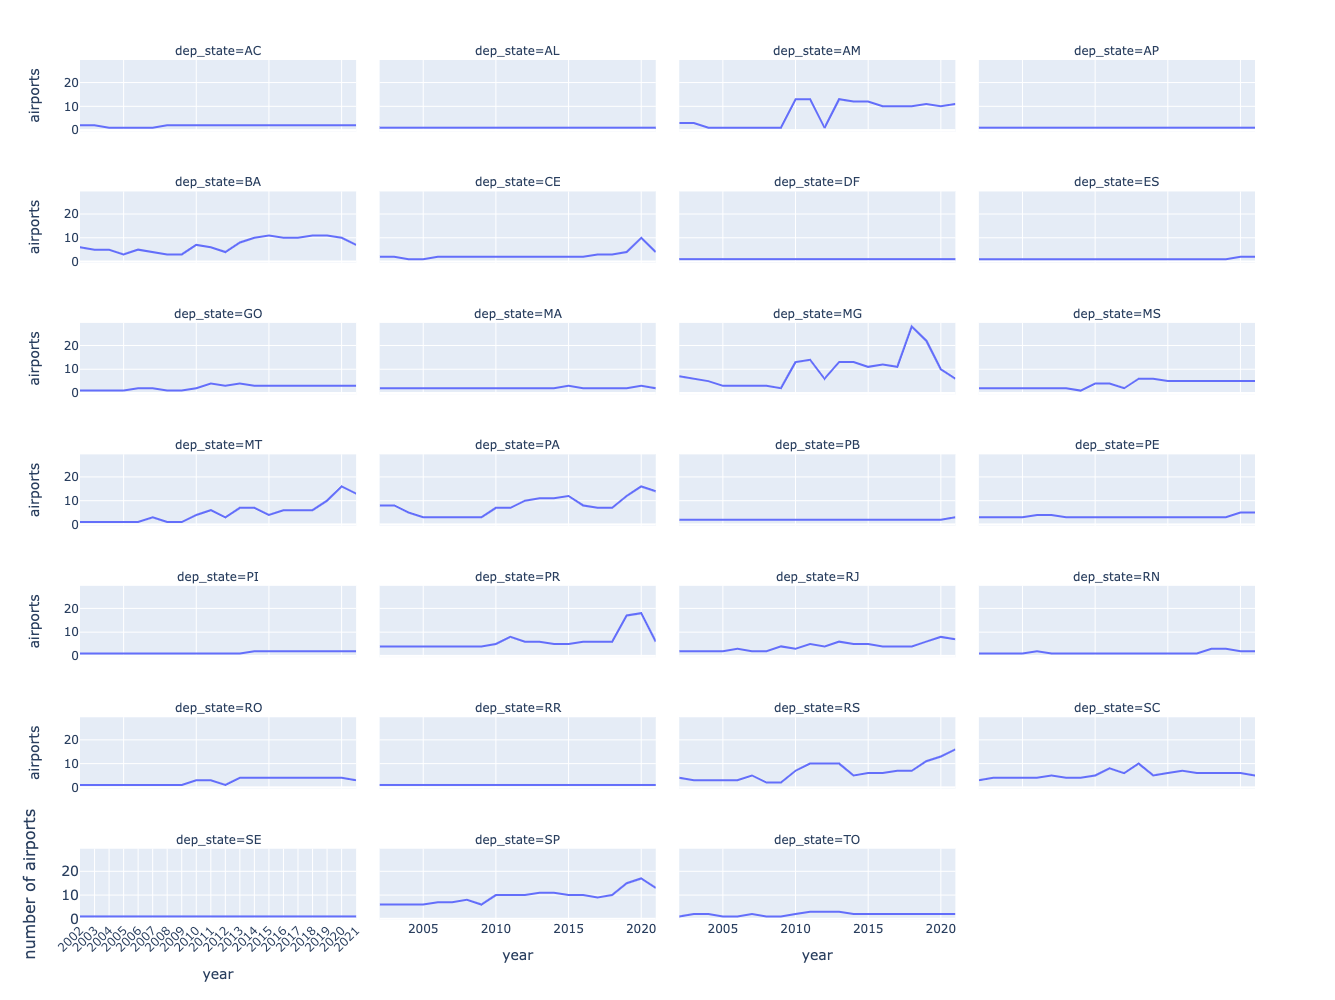

In [65]:
fig = px.line(airports_state_year, x="year", y="airports", facet_col='dep_state',
    facet_col_wrap=4)
fig.update_layout(
    title="",
    autosize=False,
    width=1000,
    height=1000,
    xaxis=dict(tickmode="linear", tickfont_size=12, tickangle=-45),
    yaxis=dict(title="number of airports", titlefont_size=16, tickfont_size=14),
)
# fig.write_html("./presentation/plots/bar_nr_airports.html")
fig.show()

In [66]:
airports_growth = airports_state_year[
    (airports_state_year.dep_state == 'MG') |
    (airports_state_year.dep_state == 'RS') |
    (airports_state_year.dep_state == 'ES')
]

In [67]:
airports_growth

dep_state  airports  year
7          ES         1  2002
10         MG         7  2002
22         RS         4  2002
34         ES         1  2003
37         MG         6  2003
49         RS         3  2003
61         ES         1  2004
64         MG         5  2004
76         RS         3  2004
88         ES         1  2005
91         MG         3  2005
103        RS         3  2005
115        ES         1  2006
118        MG         3  2006
130        RS         3  2006
142        ES         1  2007
145        MG         3  2007
157        RS         5  2007
169        ES         1  2008
172        MG         3  2008
184        RS         2  2008
196        ES         1  2009
199        MG         2  2009
211        RS         2  2009
223        ES         1  2010
226        MG        13  2010
238        RS         7  2010
250        ES         1  2011
253        MG        14  2011
265        RS        10  2011
277        ES         1  2012
280        MG         6  2012
292        RS        10  2012
304        ES         1  2013
307        MG        13  2013
319        RS        10  2013
331        ES         1  2014
334        MG        13  2014
346        RS         5  2014
358        ES         1  2015
361        MG        11  2015
373        RS         6  2015
385        ES         1  2016
388        MG        12  2016
400        RS         6  2016
412        ES         1  2017
415        MG        11  2017
427        RS         7  2017
439        ES         1  2018
442        MG        28  2018
454        RS         7  2018
466        ES         1  2019
469        MG        22  2019
481        RS        11  2019
493        ES         2  2020
496        MG        10  2020
508        RS        13  2020
520        ES         2  2021
523        MG         6  2021
535        RS        16  2021

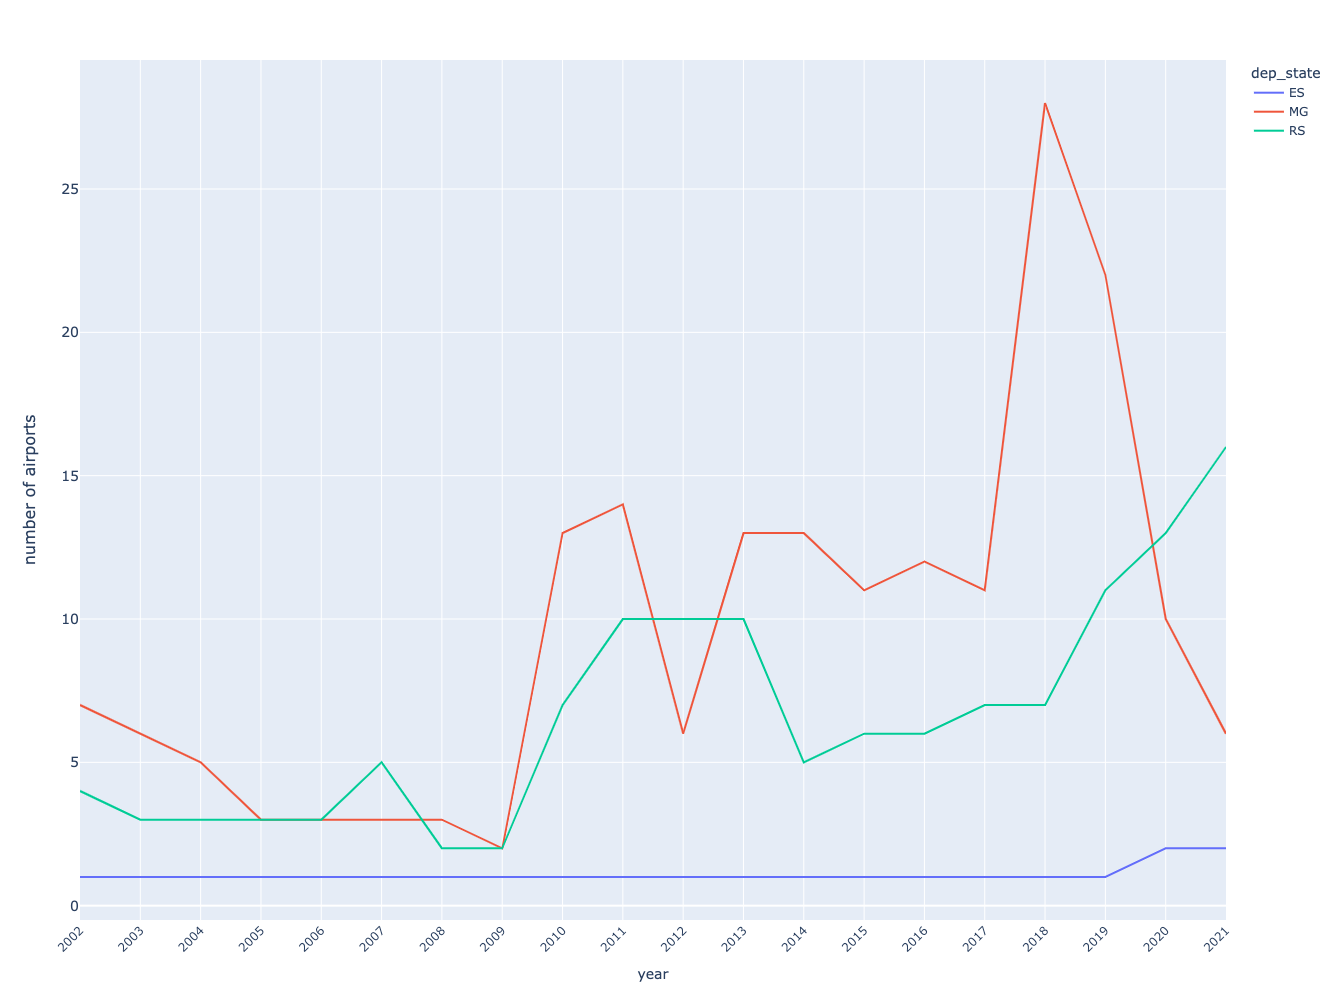

In [68]:
fig = px.line(airports_growth, x="year", y="airports", color='dep_state')
fig.update_layout(
    title="",
    autosize=False,
    width=1000,
    height=1000,
    xaxis=dict(tickmode="linear", tickfont_size=12, tickangle=-45),
    yaxis=dict(title="number of airports", titlefont_size=16, tickfont_size=14),
)
# fig.write_html("./presentation/plots/bar_nr_airports.html")
fig.show()

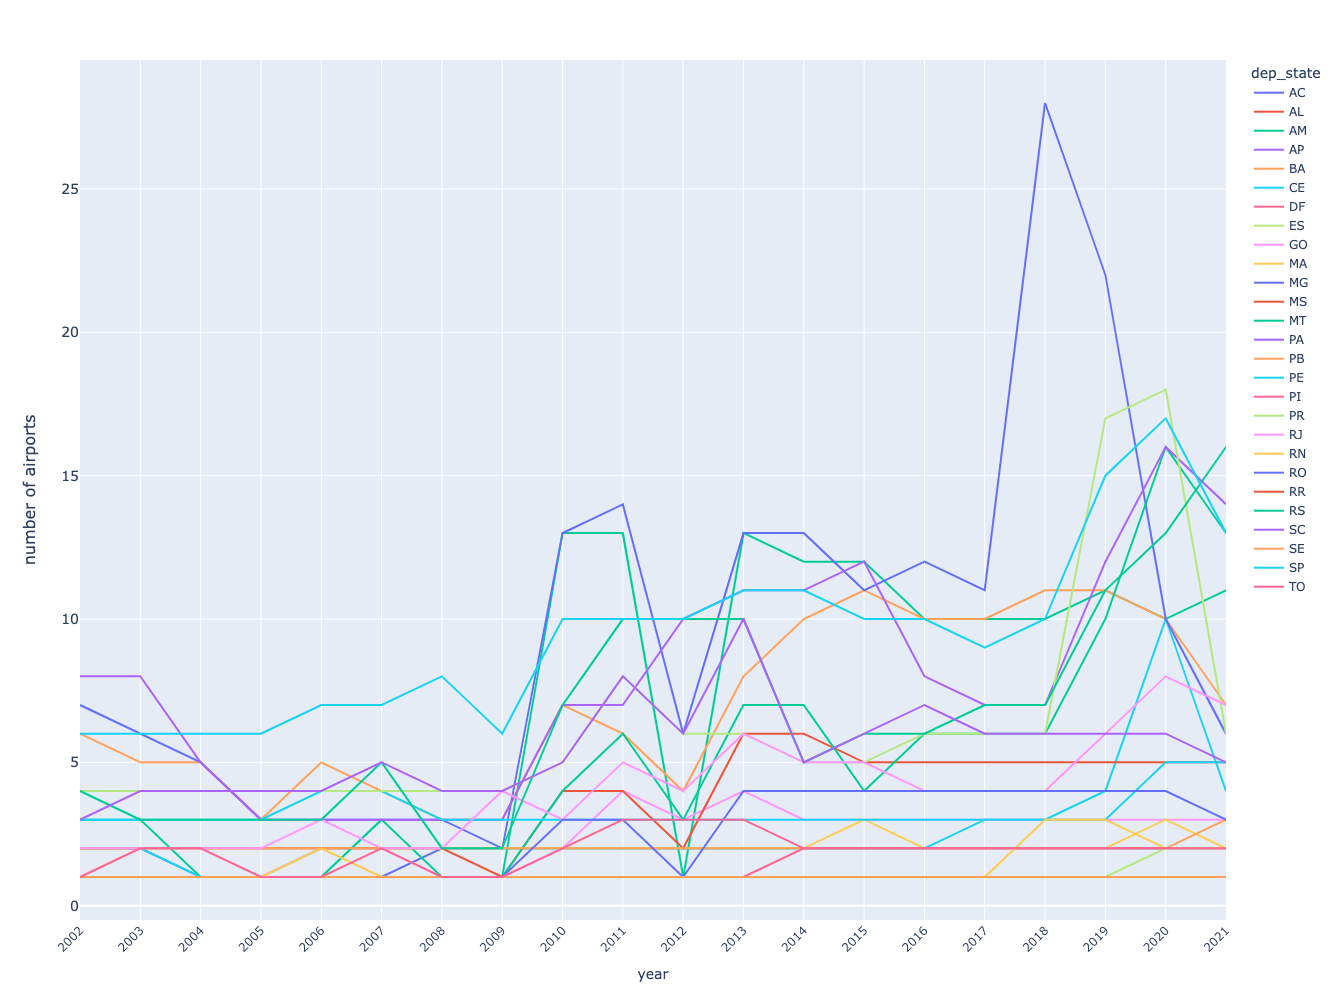

In [69]:
fig = px.line(airports_state_year, x="year", y="airports", color='dep_state')
fig.update_layout(
    title="",
    autosize=False,
    width=1000,
    height=1000,
    xaxis=dict(tickmode="linear", tickfont_size=12, tickangle=-45),
    yaxis=dict(title="number of airports", titlefont_size=16, tickfont_size=14),
)
# fig.write_html("./presentation/plots/bar_nr_airports.html")
fig.show()

In [71]:
airports_years = (
    airports_state_year.groupby("year").agg(airports=("airports", "sum")).reset_index()
)

In [72]:
airports_years

year  airports
0   2002        68
1   2003        67
2   2004        59
3   2005        52
4   2006        60
5   2007        63
6   2008        55
7   2009        53
8   2010       104
9   2011       120
10  2012        88
11  2013       131
12  2014       119
13  2015       117
14  2016       113
15  2017       111
16  2018       132
17  2019       159
18  2020       171
19  2021       138

<ipython-input-107-e454a5977d50>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



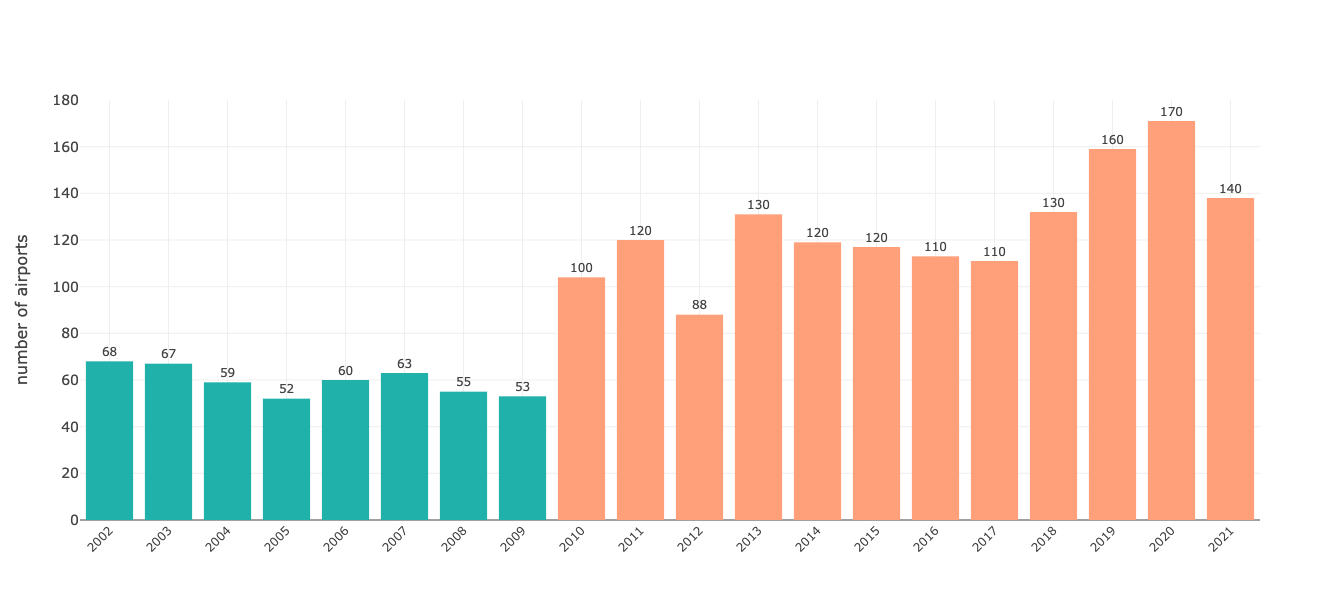

In [107]:
pio.templates.default = "gridon"
# to disable
# pio.templates.default = "none"


# data_canada = px.data.gapminder().query("country == 'Canada'")

airports_years["color"] = "lightseagreen"
airports_years["color"][8:20] = "lightsalmon"

# fig = px.bar(airports_years, x='year', y='airports', width=1000, height=600, marker={'color': airports_years['color']})

fig = go.Figure(
    go.Bar(
        x=airports_years["year"],
        y=airports_years["airports"],
        marker={"color": airports_years["color"]},
        text=airports_years["airports"],
        texttemplate="%{text:.2s}",
        textposition="outside"    )
)

# fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(
    title="",
    autosize=False,
    width=1000,
    height=600,
    xaxis=dict(tickmode="linear", tickfont_size=12, tickangle=-45),
    yaxis=dict(title="number of airports", titlefont_size=16, tickfont_size=14),
)
fig.write_html("./presentation/plots/bar_nr_airports.html")
fig.show()

# Visualizing airports on a map

In [74]:
airports_br = pd.read_csv("./assets/csv/airports_brazil.csv", sep=",")

In [75]:
# map_br = folium.Map(location=[-15, -55], tiles='cartodbpositron', zoom_start=4, width='75%', height='75%')
# map_br = folium.Map(location=[-15, -55], tiles="stamenwatercolor", zoom_start=4)

f = folium.Figure(width=1000, height=500)
map_br = folium.Map(
    location=[-16, -55], tiles="stamenwatercolor", zoom_start=4, min_zoom=4
).add_to(f)

m = folium.map.FeatureGroup()

for lat, lng, city, state, icao_code in zip(
    airports_br["lat_dd"],
    airports_br["long_dd"],
    airports_br["city_primary"],
    airports_br["state"],
    airports_br["icao_code"],
):
    m.add_child(
        folium.vector_layers.CircleMarker(
            [lat, lng],
            radius=5,
            color="green",
            fill=True,
            fill_color="yellow",
            fill_opacity=0.7,
            tooltip=str(city)
            + ", "
            + str(state)
            + " – "
            + "ICAO code: "
            + str(icao_code),
        )
    )

map_br.add_child(m)

# map_br.save("./presentation/maps/map_br.html")

map_br

- Brazil Geo JSON file location

https://github.com/codeforgermany/click_that_hood/blob/main/public/data/brazil-states.geojson

In [76]:
# denominations in the json file
import json

states_geo = r"./assets/json/brazil-states.geojson"

# open the json file - json.load() methods returns a python dictionary
with open(states_geo) as states_file:
    states_json = json.load(states_file)

# we loop through the dictionary to obtain the name of the states in the json file
denominations_json = []
for index in range(len(states_json["features"])):
    denominations_json.append(states_json["features"][index]["properties"]["name"])

denominations_json

['Acre',
 'Alagoas',
 'Amazonas',
 'Amapá',
 'Bahia',
 'Ceará',
 'Espírito Santo',
 'Goiás',
 'Maranhão',
 'Minas Gerais',
 'Mato Grosso do Sul',
 'Mato Grosso',
 'Pará',
 'Paraíba',
 'Pernambuco',
 'Piauí',
 'Paraná',
 'Rio de Janeiro',
 'Rio Grande do Norte',
 'Rondônia',
 'Roraima',
 'Rio Grande do Sul',
 'Santa Catarina',
 'Sergipe',
 'São Paulo',
 'Tocantins',
 'Distrito Federal']

In [117]:
states_geo = r"./assets/json/brazil-states.geojson"

# map_br = folium.Map(location=[-15, -55], tiles='cartodbpositron', zoom_start=4, width='75%', height='75%')
map_br = folium.Map(
    location=[-15, -55],
    tiles="stamenwatercolor",
    zoom_start=4,
    min_zoom=4,
#     width=1000,
#     height=500,
)

# generate choropleth map
map_br.choropleth(
    geo_data=states_geo,
    #     data=df,
    #     columns=['community', '2018'],
    #     key_on='feature.properties.name',
    fill_color="BuPu",
    fill_opacity=0.2,
    line_opacity=0.3,
    #     legend_name='legend',
    smooth_factor=0,
)

m = folium.map.FeatureGroup()

for lat, lng, city, state, icao_code in zip(
    airports_br["lat_dd"],
    airports_br["long_dd"],
    airports_br["city_primary"],
    airports_br["state"],
    airports_br["icao_code"],
):
    m.add_child(
        folium.vector_layers.CircleMarker(
            [lat, lng],
            radius=5,
            color="green",
            fill=True,
            fill_color="yellow",
            fill_opacity=0.7,
            tooltip=str(city)
            + ", "
            + str(state),
#             + " – "
#             + "ICAO code: "
#             + str(icao_code),
        )
    )

map_br.add_child(m)

map_br.save("./presentation/maps/map_br.html")

map_br